In [1]:
# imports
import pandas as pd
import numpy as np
import difflib
from difflib import get_close_matches
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sqlite3 import Error

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
FoursquareData = pd.read_csv('../data/CleanedFoursquareData.csv')
FoursquareData.head()

,Name,Category ID,Category Name,Latitude,Longitude,Popularity,Price,Rating
0,Ravintola Paulette,13148,French Restaurant,60.158526,24.945557,0.981589,Affordable,9.1
1,Kaffa Roastery,13034,Café,60.158463,24.934133,0.992039,Affordable,9.0
2,Daddy Greens Pizzabar - Iso Roobertinkatu,13064,Pizzeria,60.162840,24.940647,0.981128,Most Affordable,8.8
3,Ravintola Skiffer,13064,Pizzeria,60.152901,24.946306,0.967701,Affordable,8.7
4,Ravintola Pastis,13148,French Restaurant,60.164127,24.947772,0.982049,Affordable,8.6


In [3]:
RenamedFS = FoursquareData.rename(columns={'Category ID': 'Search', 'Category Name': 'Category'})
RenamedFS.head()

,Name,Search,Category,Latitude,Longitude,Popularity,Price,Rating
0,Ravintola Paulette,13148,French Restaurant,60.158526,24.945557,0.981589,Affordable,9.1
1,Kaffa Roastery,13034,Café,60.158463,24.934133,0.992039,Affordable,9.0
2,Daddy Greens Pizzabar - Iso Roobertinkatu,13064,Pizzeria,60.162840,24.940647,0.981128,Most Affordable,8.8
3,Ravintola Skiffer,13064,Pizzeria,60.152901,24.946306,0.967701,Affordable,8.7
4,Ravintola Pastis,13148,French Restaurant,60.164127,24.947772,0.982049,Affordable,8.6


In [4]:
FoursquareLabel = RenamedFS.add_prefix('Foursquare ')
FoursquareColumnsReady = FoursquareLabel.rename(columns={'Foursquare Latitude': 'Latitude','Foursquare Longitude': 'Longitude'})
FoursquareColumnsReady.head()

,Foursquare Name,Foursquare Search,Foursquare Category,Latitude,Longitude,Foursquare Popularity,Foursquare Price,Foursquare Rating
0,Ravintola Paulette,13148,French Restaurant,60.158526,24.945557,0.981589,Affordable,9.1
1,Kaffa Roastery,13034,Café,60.158463,24.934133,0.992039,Affordable,9.0
2,Daddy Greens Pizzabar - Iso Roobertinkatu,13064,Pizzeria,60.162840,24.940647,0.981128,Most Affordable,8.8
3,Ravintola Skiffer,13064,Pizzeria,60.152901,24.946306,0.967701,Affordable,8.7
4,Ravintola Pastis,13148,French Restaurant,60.164127,24.947772,0.982049,Affordable,8.6


In [5]:
# add coordinates to 3 decimal places
FoursquareColumnsReady['Rounded Latitude'] = round(FoursquareColumnsReady['Latitude'], 3)
FoursquareColumnsReady['Rounded Longitude'] = round(FoursquareColumnsReady['Longitude'], 3)

FoursquareColumnsReady

,Foursquare Name,Foursquare Search,Foursquare Category,Latitude,Longitude,Foursquare Popularity,Foursquare Price,Foursquare Rating,Rounded Latitude,Rounded Longitude
0,Ravintola Paulette,13148,French Restaurant,60.158526,24.945557,0.981589,Affordable,9.1,60.159,24.946
1,Kaffa Roastery,13034,Café,60.158463,24.934133,0.992039,Affordable,9.0,60.158,24.934
2,Daddy Greens Pizzabar - Iso Roobertinkatu,13064,Pizzeria,60.162840,24.940647,0.981128,Most Affordable,8.8,60.163,24.941
3,Ravintola Skiffer,13064,Pizzeria,60.152901,24.946306,0.967701,Affordable,8.7,60.153,24.946
4,Ravintola Pastis,13148,French Restaurant,60.164127,24.947772,0.982049,Affordable,8.6,60.164,24.948
...,...,...,...,...,...,...,...,...,...,...
4606,Momotoko - Jumbo,13065,Restaurant,60.291027,24.964193,0.000000,Not Listed,0.0,60.291,24.964
4607,HSL V1315 Nuijatie,19043,Bus Stop,60.261287,24.832883,0.543926,Not Listed,0.0,60.261,24.833
4608,Ucanlar,13065,Restaurant,60.261977,24.846986,0.000000,Not Listed,0.0,60.262,24.847
4609,M-C Avanos Oy,13065,Restaurant,60.274738,24.838036,0.000000,Not Listed,0.0,60.275,24.838


In [6]:
YelpData = pd.read_csv('../data/CleanedYelpData.csv')
YelpData.head()

,Name,Category Alias,Category Title,Latitude,Longitude,Price,Rating
0,Ravintola Vinkkeli,modern_european,Modern European,60.163900,24.946410,Most Expensive,5.0
1,Baskeri & Basso,bistros,Bistros,60.157873,24.934694,Affordable,4.8
2,Chef & Sommelier,scandinavian,Scandinavian,60.157660,24.942540,Most Expensive,4.8
3,Spis,scandinavian,Scandinavian,60.163631,24.947679,Most Expensive,4.8
4,Ani,turkish,Turkish,60.157150,24.933661,Affordable,4.5


In [7]:
RenamedY = YelpData.rename(columns={'Category Alias': 'Search', 'Category Title': 'Category'})
RenamedY.head()

,Name,Search,Category,Latitude,Longitude,Price,Rating
0,Ravintola Vinkkeli,modern_european,Modern European,60.163900,24.946410,Most Expensive,5.0
1,Baskeri & Basso,bistros,Bistros,60.157873,24.934694,Affordable,4.8
2,Chef & Sommelier,scandinavian,Scandinavian,60.157660,24.942540,Most Expensive,4.8
3,Spis,scandinavian,Scandinavian,60.163631,24.947679,Most Expensive,4.8
4,Ani,turkish,Turkish,60.157150,24.933661,Affordable,4.5


In [8]:
YelpLabel = RenamedY.add_prefix('Yelp ')
YelpColumnsReady = YelpLabel.rename(columns={'Yelp Latitude': 'Latitude','Yelp Longitude': 'Longitude'})
YelpColumnsReady.head()

,Yelp Name,Yelp Search,Yelp Category,Latitude,Longitude,Yelp Price,Yelp Rating
0,Ravintola Vinkkeli,modern_european,Modern European,60.163900,24.946410,Most Expensive,5.0
1,Baskeri & Basso,bistros,Bistros,60.157873,24.934694,Affordable,4.8
2,Chef & Sommelier,scandinavian,Scandinavian,60.157660,24.942540,Most Expensive,4.8
3,Spis,scandinavian,Scandinavian,60.163631,24.947679,Most Expensive,4.8
4,Ani,turkish,Turkish,60.157150,24.933661,Affordable,4.5


In [9]:
# add coordinates to 3 decimal places
YelpColumnsReady['Rounded Latitude'] = round(YelpColumnsReady['Latitude'], 3)
YelpColumnsReady['Rounded Longitude'] = round(YelpColumnsReady['Longitude'], 3)

YelpColumnsReady

,Yelp Name,Yelp Search,Yelp Category,Latitude,Longitude,Yelp Price,Yelp Rating,Rounded Latitude,Rounded Longitude
0,Ravintola Vinkkeli,modern_european,Modern European,60.163900,24.946410,Most Expensive,5.0,60.164,24.946
1,Baskeri & Basso,bistros,Bistros,60.157873,24.934694,Affordable,4.8,60.158,24.935
2,Chef & Sommelier,scandinavian,Scandinavian,60.157660,24.942540,Most Expensive,4.8,60.158,24.943
3,Spis,scandinavian,Scandinavian,60.163631,24.947679,Most Expensive,4.8,60.164,24.948
4,Ani,turkish,Turkish,60.157150,24.933661,Affordable,4.5,60.157,24.934
...,...,...,...,...,...,...,...,...,...
1250,Finnair Schengen Lounge,airportlounges,Airport Lounges,60.315335,24.963661,Most Affordable,2.8,60.315,24.964
1251,Burger King,"burgers, hotdogs","Burgers, Fast Food",60.319039,24.967626,Not Listed,3.0,60.319,24.968
1252,Bistrot Helsinki,bistros,Bistros,60.318599,24.968469,Not Listed,3.0,60.319,24.968
1253,O'Learys,sportsbars,Sports Bars,60.318331,24.966387,Expensive,2.2,60.318,24.966


In [10]:
# making an id based on coordinates
FoursquareColumnsReady['ID'] = FoursquareColumnsReady['Rounded Latitude'].astype(str) + '_' + FoursquareColumnsReady['Rounded Longitude'] .astype(str)
YelpColumnsReady['ID'] = YelpColumnsReady['Rounded Latitude'].astype(str) + '_' + YelpColumnsReady['Rounded Longitude'].astype(str)

In [11]:
FoursquareColumnsReady

,Foursquare Name,Foursquare Search,Foursquare Category,Latitude,Longitude,Foursquare Popularity,Foursquare Price,Foursquare Rating,Rounded Latitude,Rounded Longitude,ID
0,Ravintola Paulette,13148,French Restaurant,60.158526,24.945557,0.981589,Affordable,9.1,60.159,24.946,60.159_24.946
1,Kaffa Roastery,13034,Café,60.158463,24.934133,0.992039,Affordable,9.0,60.158,24.934,60.158_24.934
2,Daddy Greens Pizzabar - Iso Roobertinkatu,13064,Pizzeria,60.162840,24.940647,0.981128,Most Affordable,8.8,60.163,24.941,60.163_24.941
3,Ravintola Skiffer,13064,Pizzeria,60.152901,24.946306,0.967701,Affordable,8.7,60.153,24.946,60.153_24.946
4,Ravintola Pastis,13148,French Restaurant,60.164127,24.947772,0.982049,Affordable,8.6,60.164,24.948,60.164_24.948
...,...,...,...,...,...,...,...,...,...,...,...
4606,Momotoko - Jumbo,13065,Restaurant,60.291027,24.964193,0.000000,Not Listed,0.0,60.291,24.964,60.291_24.964
4607,HSL V1315 Nuijatie,19043,Bus Stop,60.261287,24.832883,0.543926,Not Listed,0.0,60.261,24.833,60.261_24.833
4608,Ucanlar,13065,Restaurant,60.261977,24.846986,0.000000,Not Listed,0.0,60.262,24.847,60.262_24.847
4609,M-C Avanos Oy,13065,Restaurant,60.274738,24.838036,0.000000,Not Listed,0.0,60.275,24.838,60.275_24.838


In [12]:
YelpColumnsReady

,Yelp Name,Yelp Search,Yelp Category,Latitude,Longitude,Yelp Price,Yelp Rating,Rounded Latitude,Rounded Longitude,ID
0,Ravintola Vinkkeli,modern_european,Modern European,60.163900,24.946410,Most Expensive,5.0,60.164,24.946,60.164_24.946
1,Baskeri & Basso,bistros,Bistros,60.157873,24.934694,Affordable,4.8,60.158,24.935,60.158_24.935
2,Chef & Sommelier,scandinavian,Scandinavian,60.157660,24.942540,Most Expensive,4.8,60.158,24.943,60.158_24.943
3,Spis,scandinavian,Scandinavian,60.163631,24.947679,Most Expensive,4.8,60.164,24.948,60.164_24.948
4,Ani,turkish,Turkish,60.157150,24.933661,Affordable,4.5,60.157,24.934,60.157_24.934
...,...,...,...,...,...,...,...,...,...,...
1250,Finnair Schengen Lounge,airportlounges,Airport Lounges,60.315335,24.963661,Most Affordable,2.8,60.315,24.964,60.315_24.964
1251,Burger King,"burgers, hotdogs","Burgers, Fast Food",60.319039,24.967626,Not Listed,3.0,60.319,24.968,60.319_24.968
1252,Bistrot Helsinki,bistros,Bistros,60.318599,24.968469,Not Listed,3.0,60.319,24.968,60.319_24.968
1253,O'Learys,sportsbars,Sports Bars,60.318331,24.966387,Expensive,2.2,60.318,24.966,60.318_24.966


In [13]:
# Create a list of unique coordinates from both dataframes
UniqueCoords = set(FoursquareColumnsReady['ID']).union(set(YelpColumnsReady['ID']))

# Filter rows from both dataframes where the coordinate is in the unique set
FoursquareFiltered = FoursquareColumnsReady[FoursquareColumnsReady['ID'].isin(UniqueCoords)]
YelpFiltered = YelpColumnsReady[YelpColumnsReady['ID'].isin(UniqueCoords)]

In [14]:
# combining by taking into account similar names
def FindCloseMatch(Name, NameList, Threshold=0.8):
    '''
    Match names based on the closest match. Takes into account names that are similar but not exactly the same.

    Args:
        Name (string): a name in a list of names.
        NameList (list): a list of names for the data points.
        Threshold (float): the least two items can match in order to be considered the same data point.

    Returns:
        a string of either the closest matching name or 'None'. 
    '''
    Matches = get_close_matches(Name, NameList, n=1, cutoff=Threshold)
    return Matches[0] if Matches else None

In [16]:
# storing matched names
NameMatchDict = {Name: FindCloseMatch(Name, YelpFiltered['Yelp Name'].tolist()) for Name in FoursquareFiltered['Foursquare Name']}

# making a column in the DataFrame for matched names
FoursquareFiltered['Matched Name'] = FoursquareFiltered['Foursquare Name'].map(NameMatchDict)

# merging based on matched names and coordinates
CombinedAPIData = pd.merge(FoursquareFiltered, YelpFiltered, left_on=['Matched Name', 'ID'], right_on=['Yelp Name', 'ID'], how='outer', suffixes=(' Foursquare', ' Yelp'))

CombinedAPIData

,Foursquare Name,Foursquare Search,Foursquare Category,Latitude Foursquare,Longitude Foursquare,Foursquare Popularity,Foursquare Price,Foursquare Rating,Rounded Latitude Foursquare,Rounded Longitude Foursquare,...,Matched Name,Yelp Name,Yelp Search,Yelp Category,Latitude Yelp,Longitude Yelp,Yelp Price,Yelp Rating,Rounded Latitude Yelp,Rounded Longitude Yelp
0,10 Hammas,15007.0,Dentist,60.210997,25.079795,0.000000,Not Listed,0.0,60.211,25.080,...,10 Hammas,10 Hammas,oralsurgeons,Oral Surgeons,60.210941,25.079729,Not Listed,4.0,60.211,25.080
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100 Dogs,cocktailbars,Cocktail Bars,60.166651,24.930848,Affordable,4.3,60.167,24.931
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3 Amigos,mexican,Mexican,60.218678,24.813096,Not Listed,3.0,60.219,24.813
3,3Amigos,13305.0,Burrito Restaurant,60.293003,25.036842,0.970977,Most Affordable,5.9,60.293,25.037,...,3 Amigos,3 Amigos,mexican,Mexican,60.292570,25.036915,Most Affordable,2.0,60.293,25.037
4,60° Bar & Brewery,13006.0,Beer Bar,60.316169,24.971572,0.995157,Not Listed,5.1,60.316,24.972,...,60° Bar & Brewery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704,HSL V6310 Uimahalli,19043.0,Bus Stop,60.299760,25.032343,0.573698,Not Listed,0.0,60.300,25.032,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5705,HSL V6524 Uimahalli,19043.0,Bus Stop,60.300103,25.033626,0.067661,Not Listed,0.0,60.300,25.034,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5706,MINI bar by Mathew,13009.0,Cocktail Bar,60.299514,25.035138,0.078487,Expensive,0.0,60.300,25.035,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5707,HSL V6207 Ammattikoulu,19043.0,Bus Stop,60.300201,25.052902,0.956020,Not Listed,0.0,60.300,25.053,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# checking for rows with data from both DataFrames
CombinedAPIData[(CombinedAPIData['Foursquare Name'].notnull()) & (CombinedAPIData['Yelp Name'].notnull())]

,Foursquare Name,Foursquare Search,Foursquare Category,Latitude Foursquare,Longitude Foursquare,Foursquare Popularity,Foursquare Price,Foursquare Rating,Rounded Latitude Foursquare,Rounded Longitude Foursquare,...,Matched Name,Yelp Name,Yelp Search,Yelp Category,Latitude Yelp,Longitude Yelp,Yelp Price,Yelp Rating,Rounded Latitude Yelp,Rounded Longitude Yelp
0,10 Hammas,15007.0,Dentist,60.210997,25.079795,0.000000,Not Listed,0.0,60.211,25.080,...,10 Hammas,10 Hammas,oralsurgeons,Oral Surgeons,60.210941,25.079729,Not Listed,4.0,60.211,25.080
3,3Amigos,13305.0,Burrito Restaurant,60.293003,25.036842,0.970977,Most Affordable,5.9,60.293,25.037,...,3 Amigos,3 Amigos,mexican,Mexican,60.292570,25.036915,Most Affordable,2.0,60.293,25.037
19,Addis Ethiopian Kitchen,13143.0,Ethiopian Restaurant,60.194381,24.956229,0.925910,Affordable,7.2,60.194,24.956,...,Addis Ethiopian Kitchen,Addis Ethiopian Kitchen,ethiopian,Ethiopian,60.194440,24.956110,Not Listed,5.0,60.194,24.956
35,Amarillo,13032.0,"Cafe, Coffee, and Tea House",60.290688,25.041820,0.941882,Most Affordable,5.2,60.291,25.042,...,Amarillo,Amarillo,"bbq, tex-mex","Barbeque, Tex-Mex",60.290787,25.041866,Expensive,2.5,60.291,25.042
42,Antep Pizza Kebab,13032.0,"Cafe, Coffee, and Tea House",60.242941,25.111369,0.945265,Most Affordable,0.0,60.243,25.111,...,Antep Pizza Kebab,Antep Pizza Kebab,pizza,Pizza,60.243221,25.110821,Not Listed,3.0,60.243,25.111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,Wanha Satama,13065.0,Restaurant,60.165758,24.967120,0.993219,Not Listed,0.0,60.166,24.967,...,Wanha Satama,Wanha Satama,professional,Professional Services,60.165539,24.967440,Not Listed,3.5,60.166,24.967
1733,X-Burger,13145.0,Fast Food Restaurant,60.183808,24.831202,0.988042,Affordable,7.0,60.184,24.831,...,X-Burger,X-Burger,burgers,Burgers,60.183621,24.831301,Most Affordable,4.3,60.184,24.831
1739,Ylästön Pizza ja Grilli,13032.0,"Cafe, Coffee, and Tea House",60.284353,24.914992,0.964994,Most Affordable,0.0,60.284,24.915,...,Ylästön Pizza ja Grilli,Ylästön Pizza ja Grilli,kebab,Kebab,60.284302,24.915070,Not Listed,3.0,60.284,24.915
1747,Zheng Sushi Bar,13003.0,Bar,60.196991,25.054640,0.975535,Affordable,7.6,60.197,25.055,...,Zheng Sushi Bar,Zheng Sushi Bar,sushi,Sushi Bars,60.196690,25.054880,Most Affordable,3.9,60.197,25.055


In [18]:
# doing by search value to eliminate issues of ambiguity that can come from the similar values in categories.
def Prioritize(Row):
    '''
    returns a search value. prioritizes Foursquare's search value.

    Args:
        Row (row): a row in a DataFrame with combined API data. iterates through the DataFrame it's applied to.

    Returns:
        a value in a new column with a search value taken from either the 'Foursquare Search' column or the 'Yelp Search' column. prioritizes Foursquare's search value.
    '''
    if Row['Foursquare Search'] != '0':
        return Row['Foursquare Search']
    
    else:
        return Row['Yelp Search']

In [28]:
# changing nulls to 0 so that the column can be converted back 
CombinedAPIData.loc[CombinedAPIData["Foursquare Search"].isnull(), "Foursquare Search"] = 0

# converting Foursquare search key back to int for cmoparison
CombinedAPIData['Foursquare Search'] = CombinedAPIData['Foursquare Search'].astype(int)
CombinedAPIData['Foursquare Search'] = CombinedAPIData['Foursquare Search'].astype(str)

CombinedAPIData.dtypes

Foursquare Name                  object
Foursquare Search                object
Foursquare Category              object
Latitude Foursquare             float64
Longitude Foursquare            float64
Foursquare Popularity           float64
Foursquare Price                 object
Foursquare Rating               float64
Rounded Latitude Foursquare     float64
Rounded Longitude Foursquare    float64
ID                               object
Matched Name                     object
Yelp Name                        object
Yelp Search                      object
Yelp Category                    object
Latitude Yelp                   float64
Longitude Yelp                  float64
Yelp Price                       object
Yelp Rating                     float64
Rounded Latitude Yelp           float64
Rounded Longitude Yelp          float64
dtype: object

In [29]:
# combining search keys into one column to be able to apply the function
CombinedAPIData['Search'] = CombinedAPIData.apply(Prioritize, axis=1)
CombinedAPIData['Search'].isnull().value_counts()

Search
False    5709
Name: count, dtype: int64

In [32]:
def Categorize(Row):
    '''
    Returns the category of the data point based on if the 'Search' column matches the Foursquare or Yelp Search.

    Args:
        Row (row): a row in a DataFrame with combined API data. iterates through the DataFrame it's applied to.

    Returns:
        the category of the data point based on if the 'Search' column matches the Foursquare or Yelp Search.

    '''

    if Row['Search'].isnumeric():

        if Row['Search'] == Row['Foursquare Search']:
            return Row['Foursquare Category']
        
        else:
            return Row['Yelp Category'] 
    
    else:
        return Row['Yelp Category']   

In [33]:
# combining category info
CombinedAPIData['Category'] = CombinedAPIData.apply(Categorize, axis=1)
CombinedAPIData['Category'].isnull().value_counts()

Category
False    5709
Name: count, dtype: int64

In [34]:
# reformatting categories
CombinedAPIData['Category'] = CombinedAPIData['Category'].str.title()
CombinedAPIData

,Foursquare Name,Foursquare Search,Foursquare Category,Latitude Foursquare,Longitude Foursquare,Foursquare Popularity,Foursquare Price,Foursquare Rating,Rounded Latitude Foursquare,Rounded Longitude Foursquare,...,Yelp Search,Yelp Category,Latitude Yelp,Longitude Yelp,Yelp Price,Yelp Rating,Rounded Latitude Yelp,Rounded Longitude Yelp,Search,Category
0,10 Hammas,15007,Dentist,60.210997,25.079795,0.000000,Not Listed,0.0,60.211,25.080,...,oralsurgeons,Oral Surgeons,60.210941,25.079729,Not Listed,4.0,60.211,25.080,15007,Dentist
1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,cocktailbars,Cocktail Bars,60.166651,24.930848,Affordable,4.3,60.167,24.931,cocktailbars,Cocktail Bars
2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,mexican,Mexican,60.218678,24.813096,Not Listed,3.0,60.219,24.813,mexican,Mexican
3,3Amigos,13305,Burrito Restaurant,60.293003,25.036842,0.970977,Most Affordable,5.9,60.293,25.037,...,mexican,Mexican,60.292570,25.036915,Most Affordable,2.0,60.293,25.037,13305,Burrito Restaurant
4,60° Bar & Brewery,13006,Beer Bar,60.316169,24.971572,0.995157,Not Listed,5.1,60.316,24.972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13006,Beer Bar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704,HSL V6310 Uimahalli,19043,Bus Stop,60.299760,25.032343,0.573698,Not Listed,0.0,60.300,25.032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19043,Bus Stop
5705,HSL V6524 Uimahalli,19043,Bus Stop,60.300103,25.033626,0.067661,Not Listed,0.0,60.300,25.034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19043,Bus Stop
5706,MINI bar by Mathew,13009,Cocktail Bar,60.299514,25.035138,0.078487,Expensive,0.0,60.300,25.035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13009,Cocktail Bar
5707,HSL V6207 Ammattikoulu,19043,Bus Stop,60.300201,25.052902,0.956020,Not Listed,0.0,60.300,25.053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19043,Bus Stop


In [35]:
# combining the rounded lat lon columns so it's easier to pull from this value
CombinedAPIData['Rounded Latitude'] = CombinedAPIData['Rounded Latitude Foursquare'].combine_first(CombinedAPIData['Rounded Latitude Yelp'])
CombinedAPIData['Rounded Longitude'] = CombinedAPIData['Rounded Longitude Foursquare'].combine_first(CombinedAPIData['Rounded Longitude Yelp'])
CombinedAPIData

,Foursquare Name,Foursquare Search,Foursquare Category,Latitude Foursquare,Longitude Foursquare,Foursquare Popularity,Foursquare Price,Foursquare Rating,Rounded Latitude Foursquare,Rounded Longitude Foursquare,...,Latitude Yelp,Longitude Yelp,Yelp Price,Yelp Rating,Rounded Latitude Yelp,Rounded Longitude Yelp,Search,Category,Rounded Latitude,Rounded Longitude
0,10 Hammas,15007,Dentist,60.210997,25.079795,0.000000,Not Listed,0.0,60.211,25.080,...,60.210941,25.079729,Not Listed,4.0,60.211,25.080,15007,Dentist,60.211,25.080
1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.166651,24.930848,Affordable,4.3,60.167,24.931,cocktailbars,Cocktail Bars,60.167,24.931
2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.218678,24.813096,Not Listed,3.0,60.219,24.813,mexican,Mexican,60.219,24.813
3,3Amigos,13305,Burrito Restaurant,60.293003,25.036842,0.970977,Most Affordable,5.9,60.293,25.037,...,60.292570,25.036915,Most Affordable,2.0,60.293,25.037,13305,Burrito Restaurant,60.293,25.037
4,60° Bar & Brewery,13006,Beer Bar,60.316169,24.971572,0.995157,Not Listed,5.1,60.316,24.972,...,NaN,NaN,NaN,NaN,NaN,NaN,13006,Beer Bar,60.316,24.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704,HSL V6310 Uimahalli,19043,Bus Stop,60.299760,25.032343,0.573698,Not Listed,0.0,60.300,25.032,...,NaN,NaN,NaN,NaN,NaN,NaN,19043,Bus Stop,60.300,25.032
5705,HSL V6524 Uimahalli,19043,Bus Stop,60.300103,25.033626,0.067661,Not Listed,0.0,60.300,25.034,...,NaN,NaN,NaN,NaN,NaN,NaN,19043,Bus Stop,60.300,25.034
5706,MINI bar by Mathew,13009,Cocktail Bar,60.299514,25.035138,0.078487,Expensive,0.0,60.300,25.035,...,NaN,NaN,NaN,NaN,NaN,NaN,13009,Cocktail Bar,60.300,25.035
5707,HSL V6207 Ammattikoulu,19043,Bus Stop,60.300201,25.052902,0.956020,Not Listed,0.0,60.300,25.053,...,NaN,NaN,NaN,NaN,NaN,NaN,19043,Bus Stop,60.300,25.053


In [36]:
# making a combined Rating column that averages if relevant
def AverageRating(row):
    '''
    Returns a rating for a data point based on what values are in the 'Foursquare Rating' column and the 'Yelp Rating' column. If both columns have a rating above 0, the new rating is an average. Otherwise the rating returned is the only rating available. No available rating returns None.

    Args:
        row (row): a row in a DataFrame of combined API data. represents a data point.

    Returns:
        a rating for a data point. returns the average if both APIs have a value. if only one API has a rating value, returns that value. otherwise returns None.
    '''
    Count = 0
    Total = 0
    AdjustedYelp = 0

    if pd.notnull(row['Foursquare Rating']) and row['Foursquare Rating'] > 0:
        Count += 1
        Total += row['Foursquare Rating']

    if pd.notnull(row['Yelp Rating']) and row['Yelp Rating'] > 0:
        Count += 1
        AdjustedYelp += (row['Yelp Rating']*2)
        Total += AdjustedYelp
        
    if Count > 0:
        Rating = Total / Count
    else:
        Rating = None  
    
    return Rating

In [37]:
CombinedAPIData['Rating'] = CombinedAPIData.apply(AverageRating, axis=1)
CombinedAPIData

,Foursquare Name,Foursquare Search,Foursquare Category,Latitude Foursquare,Longitude Foursquare,Foursquare Popularity,Foursquare Price,Foursquare Rating,Rounded Latitude Foursquare,Rounded Longitude Foursquare,...,Longitude Yelp,Yelp Price,Yelp Rating,Rounded Latitude Yelp,Rounded Longitude Yelp,Search,Category,Rounded Latitude,Rounded Longitude,Rating
0,10 Hammas,15007,Dentist,60.210997,25.079795,0.000000,Not Listed,0.0,60.211,25.080,...,25.079729,Not Listed,4.0,60.211,25.080,15007,Dentist,60.211,25.080,8.00
1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.930848,Affordable,4.3,60.167,24.931,cocktailbars,Cocktail Bars,60.167,24.931,8.60
2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.813096,Not Listed,3.0,60.219,24.813,mexican,Mexican,60.219,24.813,6.00
3,3Amigos,13305,Burrito Restaurant,60.293003,25.036842,0.970977,Most Affordable,5.9,60.293,25.037,...,25.036915,Most Affordable,2.0,60.293,25.037,13305,Burrito Restaurant,60.293,25.037,4.95
4,60° Bar & Brewery,13006,Beer Bar,60.316169,24.971572,0.995157,Not Listed,5.1,60.316,24.972,...,NaN,NaN,NaN,NaN,NaN,13006,Beer Bar,60.316,24.972,5.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704,HSL V6310 Uimahalli,19043,Bus Stop,60.299760,25.032343,0.573698,Not Listed,0.0,60.300,25.032,...,NaN,NaN,NaN,NaN,NaN,19043,Bus Stop,60.300,25.032,NaN
5705,HSL V6524 Uimahalli,19043,Bus Stop,60.300103,25.033626,0.067661,Not Listed,0.0,60.300,25.034,...,NaN,NaN,NaN,NaN,NaN,19043,Bus Stop,60.300,25.034,NaN
5706,MINI bar by Mathew,13009,Cocktail Bar,60.299514,25.035138,0.078487,Expensive,0.0,60.300,25.035,...,NaN,NaN,NaN,NaN,NaN,13009,Cocktail Bar,60.300,25.035,NaN
5707,HSL V6207 Ammattikoulu,19043,Bus Stop,60.300201,25.052902,0.956020,Not Listed,0.0,60.300,25.053,...,NaN,NaN,NaN,NaN,NaN,19043,Bus Stop,60.300,25.053,NaN


In [38]:
# dropping the columns no longer needed
CombinedAPIData = CombinedAPIData.drop(columns=
                                       ['ID'
                                        ,'Foursquare Search'
                                        ,'Foursquare Category'
                                        ,'Latitude Foursquare'
                                        ,'Longitude Foursquare'
                                        ,'Yelp Search'
                                        ,'Yelp Category'
                                        ,'Latitude Yelp'
                                        ,'Longitude Yelp'
                                        ,'Rounded Latitude Foursquare'
                                        ,'Rounded Longitude Foursquare'
                                        ,'Rounded Latitude Yelp'
                                        ,'Rounded Longitude Yelp'
                                        ,'Foursquare Rating'
                                        ,'Yelp Rating'])
CombinedAPIData

,Foursquare Name,Foursquare Popularity,Foursquare Price,Matched Name,Yelp Name,Yelp Price,Search,Category,Rounded Latitude,Rounded Longitude,Rating
0,10 Hammas,0.000000,Not Listed,10 Hammas,10 Hammas,Not Listed,15007,Dentist,60.211,25.080,8.00
1,NaN,NaN,NaN,NaN,100 Dogs,Affordable,cocktailbars,Cocktail Bars,60.167,24.931,8.60
2,NaN,NaN,NaN,NaN,3 Amigos,Not Listed,mexican,Mexican,60.219,24.813,6.00
3,3Amigos,0.970977,Most Affordable,3 Amigos,3 Amigos,Most Affordable,13305,Burrito Restaurant,60.293,25.037,4.95
4,60° Bar & Brewery,0.995157,Not Listed,60° Bar & Brewery,NaN,NaN,13006,Beer Bar,60.316,24.972,5.10
...,...,...,...,...,...,...,...,...,...,...,...
5704,HSL V6310 Uimahalli,0.573698,Not Listed,None,NaN,NaN,19043,Bus Stop,60.300,25.032,NaN
5705,HSL V6524 Uimahalli,0.067661,Not Listed,None,NaN,NaN,19043,Bus Stop,60.300,25.034,NaN
5706,MINI bar by Mathew,0.078487,Expensive,None,NaN,NaN,13009,Cocktail Bar,60.300,25.035,NaN
5707,HSL V6207 Ammattikoulu,0.956020,Not Listed,None,NaN,NaN,19043,Bus Stop,60.300,25.053,NaN


In [39]:
# saving joined data
csv_path = '../data/CombinedAPIData.csv'

CombinedAPIData.to_csv(csv_path, index=False)

In [41]:
HelsinkiBikesData = pd.read_csv('../data/HelsinkiBikesData.csv')
HelsinkiBikesData.head()

,latitude,longitude,free_bikes
0,60.155445,24.950293,24
1,60.160959,24.956347,3
2,60.158189,24.944927,6
3,60.160986,24.941776,0
4,60.162225,24.929710,11


In [42]:
# make a label column for what the data point is
CombinedAPIData.insert(0,'Data Point','Point of Interest')
CombinedAPIData

,Data Point,Foursquare Name,Foursquare Popularity,Foursquare Price,Matched Name,Yelp Name,Yelp Price,Search,Category,Rounded Latitude,Rounded Longitude,Rating
0,Point of Interest,10 Hammas,0.000000,Not Listed,10 Hammas,10 Hammas,Not Listed,15007,Dentist,60.211,25.080,8.00
1,Point of Interest,NaN,NaN,NaN,NaN,100 Dogs,Affordable,cocktailbars,Cocktail Bars,60.167,24.931,8.60
2,Point of Interest,NaN,NaN,NaN,NaN,3 Amigos,Not Listed,mexican,Mexican,60.219,24.813,6.00
3,Point of Interest,3Amigos,0.970977,Most Affordable,3 Amigos,3 Amigos,Most Affordable,13305,Burrito Restaurant,60.293,25.037,4.95
4,Point of Interest,60° Bar & Brewery,0.995157,Not Listed,60° Bar & Brewery,NaN,NaN,13006,Beer Bar,60.316,24.972,5.10
...,...,...,...,...,...,...,...,...,...,...,...,...
5704,Point of Interest,HSL V6310 Uimahalli,0.573698,Not Listed,None,NaN,NaN,19043,Bus Stop,60.300,25.032,NaN
5705,Point of Interest,HSL V6524 Uimahalli,0.067661,Not Listed,None,NaN,NaN,19043,Bus Stop,60.300,25.034,NaN
5706,Point of Interest,MINI bar by Mathew,0.078487,Expensive,None,NaN,NaN,13009,Cocktail Bar,60.300,25.035,NaN
5707,Point of Interest,HSL V6207 Ammattikoulu,0.956020,Not Listed,None,NaN,NaN,19043,Bus Stop,60.300,25.053,NaN


In [43]:
HelsinkiBikesData.insert(0,'Data Point','Bike Spot')
HelsinkiBikesData

,Data Point,latitude,longitude,free_bikes
0,Bike Spot,60.155445,24.950293,24
1,Bike Spot,60.160959,24.956347,3
2,Bike Spot,60.158189,24.944927,6
3,Bike Spot,60.160986,24.941776,0
4,Bike Spot,60.162225,24.929710,11
...,...,...,...,...
577,Bike Spot,60.318755,24.849931,1
578,Bike Spot,60.275840,24.845512,5
579,Bike Spot,60.318471,24.831207,3
580,Bike Spot,60.250978,24.986935,27


In [44]:
# add coordinates to 3 decimal places
HelsinkiBikesData['Rounded Latitude'] = round(HelsinkiBikesData['latitude'], 3)
HelsinkiBikesData['Rounded Longitude'] = round(HelsinkiBikesData['longitude'], 3)
HelsinkiBikesData = HelsinkiBikesData.rename(columns={'free_bikes' : 'Free Bikes'})
HelsinkiBikesData


,Data Point,latitude,longitude,Free Bikes,Rounded Latitude,Rounded Longitude
0,Bike Spot,60.155445,24.950293,24,60.155,24.950
1,Bike Spot,60.160959,24.956347,3,60.161,24.956
2,Bike Spot,60.158189,24.944927,6,60.158,24.945
3,Bike Spot,60.160986,24.941776,0,60.161,24.942
4,Bike Spot,60.162225,24.929710,11,60.162,24.930
...,...,...,...,...,...,...
577,Bike Spot,60.318755,24.849931,1,60.319,24.850
578,Bike Spot,60.275840,24.845512,5,60.276,24.846
579,Bike Spot,60.318471,24.831207,3,60.318,24.831
580,Bike Spot,60.250978,24.986935,27,60.251,24.987


In [45]:
HelsinkiBikesData = HelsinkiBikesData.drop(columns=['latitude','longitude'])
HelsinkiBikesData

,Data Point,Free Bikes,Rounded Latitude,Rounded Longitude
0,Bike Spot,24,60.155,24.950
1,Bike Spot,3,60.161,24.956
2,Bike Spot,6,60.158,24.945
3,Bike Spot,0,60.161,24.942
4,Bike Spot,11,60.162,24.930
...,...,...,...,...
577,Bike Spot,1,60.319,24.850
578,Bike Spot,5,60.276,24.846
579,Bike Spot,3,60.318,24.831
580,Bike Spot,27,60.251,24.987


In [46]:
# saving data
combined = '../data/CombinedAPIDataReady.csv'
bikes = '../data/HelsinkiBikesDataReady.csv'

CombinedAPIData.to_csv(combined, index=False)
HelsinkiBikesData.to_csv(bikes, index=False)

In [47]:
# combine
CombinedPointData = pd.concat([CombinedAPIData, HelsinkiBikesData], axis=0)
CombinedPointData['Data Point'].value_counts()

Data Point
Point of Interest    5709
Bike Spot             582
Name: count, dtype: int64

In [48]:
# changing Free Bikes nulls into 0
CombinedPointData.loc[CombinedPointData['Free Bikes'].isnull(), 'Free Bikes'] = 0

# using the average of Rating to impute
AverageRatingValue = CombinedPointData['Rating'].mean()
CombinedPointData.loc[CombinedPointData['Rating'].isnull(), 'Rating'] = AverageRatingValue

CombinedPointData

,Data Point,Foursquare Name,Foursquare Popularity,Foursquare Price,Matched Name,Yelp Name,Yelp Price,Search,Category,Rounded Latitude,Rounded Longitude,Rating,Free Bikes
0,Point of Interest,10 Hammas,0.000000,Not Listed,10 Hammas,10 Hammas,Not Listed,15007,Dentist,60.211,25.080,8.000000,0.0
1,Point of Interest,NaN,NaN,NaN,NaN,100 Dogs,Affordable,cocktailbars,Cocktail Bars,60.167,24.931,8.600000,0.0
2,Point of Interest,NaN,NaN,NaN,NaN,3 Amigos,Not Listed,mexican,Mexican,60.219,24.813,6.000000,0.0
3,Point of Interest,3Amigos,0.970977,Most Affordable,3 Amigos,3 Amigos,Most Affordable,13305,Burrito Restaurant,60.293,25.037,4.950000,0.0
4,Point of Interest,60° Bar & Brewery,0.995157,Not Listed,60° Bar & Brewery,NaN,NaN,13006,Beer Bar,60.316,24.972,5.100000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,Bike Spot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.319,24.850,7.139481,1.0
578,Bike Spot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.276,24.846,7.139481,5.0
579,Bike Spot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.318,24.831,7.139481,3.0
580,Bike Spot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.251,24.987,7.139481,27.0


In [49]:
# saving data
csv_path = '../data/CombinedPointData.csv'

CombinedPointData.to_csv(csv_path, index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

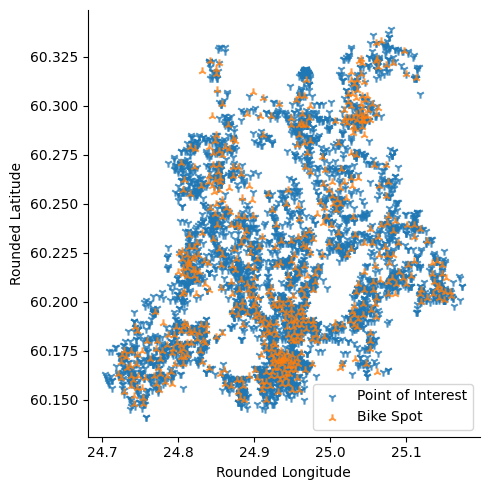

In [50]:
# scatter of lat lon (y, x)
sns.lmplot(data=CombinedPointData, x='Rounded Longitude', y='Rounded Latitude', fit_reg=False, markers=['1','2'], hue='Data Point', legend=False)
plt.legend(loc='lower right')

Every Bike Spot is relatively close to at least one Point of Interest, but there are Points of Interest that aren't relatively close to a Bike Spot. This gives a bit of strength to the idea that Bike Spot locations are dependent on Point of Interest locations.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [53]:
HelsinkiBikesDataReady = pd.read_csv('../data/HelsinkiBikesDataReady.csv')
CleanedFoursquareData = pd.read_csv('../data/CleanedFoursquareData.csv')
CleanedYelpData = pd.read_csv('../data/CleanedYelpData.csv')

In [54]:
DatabasePath = '../data/CombinedPointDatabase.db'

# connecting to database. also creating it
Connection = sqlite3.connect(DatabasePath)

# adding tables to database
CombinedPointData.to_sql('Combined_Point_Data', Connection, if_exists='replace')
HelsinkiBikesDataReady.to_sql('Helsinki_Bikes_Data', Connection, if_exists='replace')
CleanedFoursquareData.to_sql('Foursquare_Data', Connection, if_exists='replace')
CleanedYelpData.to_sql('Yelp_Data', Connection, if_exists='replace')

Connection.close()

Look at the data before and after the join to validate your data.

In [55]:
def ExecuteQuery(Connection, Query):
    Cursor = Connection.cursor()
    try:
        Cursor.execute(Query)
        Connection.commit()
        Result = Cursor.fetchall()
        print("Query executed successfully")
        return Result

    except Error as err:
        print(f"The error '{err}' occurred")

In [56]:
Connection = sqlite3.connect(DatabasePath)

In [57]:
# Bikes
SelectBikes = 'SELECT * FROM Helsinki_Bikes_Data'
Bikes = ExecuteQuery(Connection, SelectBikes)

for stop in Bikes:
    print(stop)

Query executed successfully
(0, 'Bike Spot', 24, 60.155, 24.95)
(1, 'Bike Spot', 3, 60.161, 24.956)
(2, 'Bike Spot', 6, 60.158, 24.945)
(3, 'Bike Spot', 0, 60.161, 24.942)
(4, 'Bike Spot', 11, 60.162, 24.93)
(5, 'Bike Spot', 3, 60.165, 24.939)
(6, 'Bike Spot', 1, 60.167, 24.944)
(7, 'Bike Spot', 4, 60.165, 24.949)
(8, 'Bike Spot', 15, 60.167, 24.951)
(9, 'Bike Spot', 24, 60.168, 24.958)
(10, 'Bike Spot', 1, 60.168, 24.976)
(11, 'Bike Spot', 10, 60.169, 24.952)
(12, 'Bike Spot', 6, 60.171, 24.956)
(13, 'Bike Spot', 7, 60.174, 24.962)
(14, 'Bike Spot', 0, 60.173, 24.95)
(15, 'Bike Spot', 1, 60.17, 24.949)
(16, 'Bike Spot', 1, 60.171, 24.94)
(17, 'Bike Spot', 0, 60.171, 24.937)
(18, 'Bike Spot', 0, 60.17, 24.935)
(19, 'Bike Spot', 1, 60.166, 24.927)
(20, 'Bike Spot', 6, 60.164, 24.923)
(21, 'Bike Spot', 5, 60.164, 24.915)
(22, 'Bike Spot', 1, 60.171, 24.932)
(23, 'Bike Spot', 2, 60.171, 24.925)
(24, 'Bike Spot', 3, 60.174, 24.928)
(25, 'Bike Spot', 3, 60.176, 24.922)
(26, 'Bike Spot', 1, 

In [58]:
# Foursquare
SelectFS = 'SELECT * FROM Foursquare_Data'
Foursquare = ExecuteQuery(Connection, SelectFS)

for ele in Foursquare:
    print(ele)

Query executed successfully
(0, 'Ravintola Paulette', 13148, 'French Restaurant', 60.158526, 24.945557, 0.9815886460623304, 'Affordable', 9.1)
(1, 'Kaffa Roastery', 13034, 'Café', 60.158463, 24.934133, 0.992038988749515, 'Affordable', 9.0)
(2, 'Daddy Greens Pizzabar - Iso Roobertinkatu', 13064, 'Pizzeria', 60.16284, 24.940647, 0.9811279581016424, 'Most Affordable', 8.8)
(3, 'Ravintola Skiffer', 13064, 'Pizzeria', 60.152901, 24.946306, 0.9677014019431268, 'Affordable', 8.7)
(4, 'Ravintola Pastis', 13148, 'French Restaurant', 60.164127, 24.947772, 0.9820493340230184, 'Affordable', 8.6)
(5, 'Restaurant Elm', 13065, 'Restaurant', 60.156974, 24.952636, 0.989517328333118, 'Not Listed', 8.6)
(6, 'Café Succès', 13034, 'Café', 60.159946, 24.946425, 0.990996379154274, 'Most Affordable', 8.5)
(7, 'BasBas Kulma', 13065, 'Restaurant', 60.158246, 24.934388, 0.9713646062330272, 'Not Listed', 8.4)
(8, 'Kanniston Leipomo myymälä', 13002, 'Bakery', 60.159244, 24.936898, 0.9845144187249448, 'Most Afforda

In [59]:
# Yelp
SelectYelp = 'SELECT * FROM Yelp_Data'
Yelp = ExecuteQuery(Connection, SelectYelp)

for ele in Yelp:
    print(ele)

Query executed successfully
(0, 'Ravintola Vinkkeli', 'modern_european', 'Modern European', 60.1639, 24.94641, 'Most Expensive', 5.0)
(1, 'Baskeri &  Basso', 'bistros', 'Bistros', 60.1578732195411, 24.934694096446, 'Affordable', 4.8)
(2, 'Chef & Sommelier', 'scandinavian', 'Scandinavian', 60.15766, 24.94254, 'Most Expensive', 4.8)
(3, 'Spis', 'scandinavian', 'Scandinavian', 60.1636314, 24.9476795, 'Most Expensive', 4.8)
(4, 'Ani', 'turkish', 'Turkish', 60.1571504587047, 24.9336607849584, 'Affordable', 4.5)
(5, 'Ora', 'scandinavian', 'Scandinavian', 60.15766, 24.94254, 'Not Listed', 5.0)
(6, 'Yes yes yes', 'vegan', 'Vegan', 60.1642087586756, 24.9439802393317, 'Not Listed', 5.0)
(7, 'Vibami', 'vietnamese', 'Vietnamese', 60.1631, 24.94172, 'Affordable', 4.5)
(8, 'Tommyknocker', 'pubs', 'Pubs', 60.1634598, 24.9412804, 'Affordable', 4.4)
(9, 'The Riff', 'bars', 'Bars', 60.1641388, 24.9428196, 'Affordable', 4.4)
(10, 'Hills Dumplings', 'dimsum', 'Dim Sum', 60.16441, 24.94533, 'Not Listed', 4

In [60]:
# Combined
SelectCombined = 'SELECT * FROM Combined_Point_Data'
Combined = ExecuteQuery(Connection, SelectCombined)

for ele in Combined:
    print(ele)

Query executed successfully
(0, 'Point of Interest', '10 Hammas', 0.0, 'Not Listed', '10 Hammas', '10 Hammas', 'Not Listed', '15007', 'Dentist', 60.211, 25.08, 8.0, 0.0)
(1, 'Point of Interest', None, None, None, None, '100 Dogs', 'Affordable', 'cocktailbars', 'Cocktail Bars', 60.167, 24.931, 8.6, 0.0)
(2, 'Point of Interest', None, None, None, None, '3 Amigos', 'Not Listed', 'mexican', 'Mexican', 60.219, 24.813, 6.0, 0.0)
(3, 'Point of Interest', '3Amigos', 0.9709768170649192, 'Most Affordable', '3 Amigos', '3 Amigos', 'Most Affordable', '13305', 'Burrito Restaurant', 60.293, 25.037, 4.95, 0.0)
(4, 'Point of Interest', '60° Bar & Brewery', 0.9951568676329192, 'Not Listed', '60° Bar & Brewery', None, None, '13006', 'Beer Bar', 60.316, 24.972, 5.1, 0.0)
(5, 'Point of Interest', None, None, None, None, '60° Bar & Brewery', 'Expensive', 'bars', 'Bars', 60.317, 24.97, 9.0, 0.0)
(6, 'Point of Interest', None, None, None, None, '99 burgers', 'Not Listed', 'burgers', 'Burgers', 60.228, 24.963

In [61]:
Connection.close()